In [3]:
import pandas as pd
gold_data = pd.read_csv('Daily_Gold_Price_on_World.csv\Daily_Gold_Price_on_World.csv')
print(gold_data.head())

         Date  US dollar (USD)  Euro (EUR)  Japanese yen (JPY)  \
0  1979-01-01           226.00      137.06                0.00   
1  1979-01-02           226.80      137.29            43164.91   
2  1979-01-03           218.60      134.01            43717.90   
3  1979-01-04           223.15      136.79            43674.89   
4  1979-01-05           225.50      138.35            44582.47   

   Pound sterling (GBP)  Canadian dollar (CAD)  Swiss franc (CHF)  \
0                110.70                   0.00               0.00   
1                111.45                 263.74             359.62   
2                107.98                 264.39             365.87   
3                110.66                 264.14             366.38   
4                111.63                 268.39             373.72   

   Indian rupee (INR)  Chinese renmimbi (CNY)  Turkish lira (TRY)  \
0                0.00                     0.0                 0.0   
1             1792.85                     0.0     

In [4]:
print(gold_data.isnull().sum())
gold_data.fillna(method='ffill', inplace=True)
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data.set_index('Date', inplace=True)
print(gold_data.head())

Date                        0
US dollar (USD)             0
Euro (EUR)                  0
Japanese yen (JPY)          0
Pound sterling (GBP)        0
Canadian dollar (CAD)       0
Swiss franc (CHF)           0
Indian rupee (INR)          0
Chinese renmimbi (CNY)      0
Turkish lira (TRY)          0
Saudi riyal (SAR)           0
Indonesian rupiah (IDR)     0
UAE dirham (AED)            0
Thai baht THB)              0
Vietnamese dong (VND)       0
Egyptian pound (EGP)        0
Korean won (KRW)            0
Russian ruble (RUB)         0
South African rand (ZAR)    0
Australian dollar (AUD)     0
dtype: int64
            US dollar (USD)  Euro (EUR)  Japanese yen (JPY)  \
Date                                                          
1979-01-01           226.00      137.06                0.00   
1979-01-02           226.80      137.29            43164.91   
1979-01-03           218.60      134.01            43717.90   
1979-01-04           223.15      136.79            43674.89   
1979-01-0

In [9]:
print(gold_data.columns)

Index(['US dollar (USD)', 'Euro (EUR)', 'Japanese yen (JPY)',
       'Pound sterling (GBP)', 'Canadian dollar (CAD)', 'Swiss franc (CHF)',
       'Indian rupee (INR)', 'Chinese renmimbi (CNY)', 'Turkish lira (TRY)',
       'Saudi riyal (SAR)', 'Indonesian rupiah (IDR)', 'UAE dirham (AED)',
       'Thai baht THB)', 'Vietnamese dong (VND)', 'Egyptian pound (EGP)',
       'Korean won (KRW)', 'Russian ruble (RUB)', 'South African rand (ZAR)',
       'Australian dollar (AUD)'],
      dtype='object')


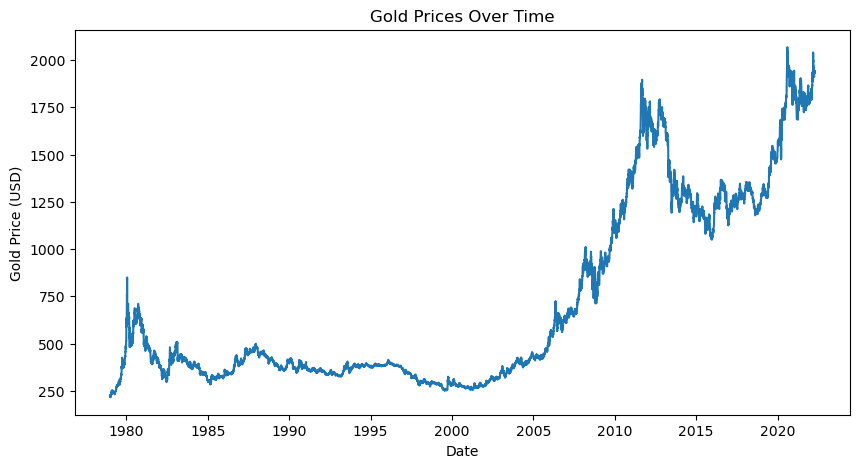

       US dollar (USD)    Euro (EUR)  Japanese yen (JPY)  \
count     11290.000000  11290.000000        11290.000000   
mean        710.974902    589.062481        84894.023066   
std         490.671320    399.843565        46839.328458   
min         216.850000    133.830000            0.000000   
25%         353.325000    306.530000        42938.030000   
50%         419.250000    369.270000        72524.010000   
75%        1191.500000    965.202500       127460.197500   
max        2067.150000   1874.560000       241519.850000   

       Pound sterling (GBP)  Canadian dollar (CAD)  Swiss franc (CHF)  \
count          11290.000000           11290.000000       11290.000000   
mean             464.587744             865.463364         840.207880   
std              362.529480             571.936527         379.425081   
min              107.980000               0.000000           0.000000   
25%              217.602500             456.605000         500.690000   
50%              257.

In [10]:
import matplotlib.pyplot as plt
price_column = 'US dollar (USD)'
plt.figure(figsize=(10, 5))
plt.plot(gold_data.index, gold_data[price_column])
plt.xlabel('Date')
plt.ylabel('Gold Price (USD)')
plt.title('Gold Prices Over Time')
plt.show()
print(gold_data.describe())

In [12]:
gold_data['MA50'] = gold_data['US dollar (USD)'].rolling(window=50).mean()
gold_data['MA200'] = gold_data['US dollar (USD)'].rolling(window=200).mean()
gold_data.dropna(inplace=True)
print(gold_data.head())

            US dollar (USD)  Euro (EUR)  Japanese yen (JPY)  \
Date                                                          
1979-10-05            385.0      228.52            82378.01   
1979-10-08            372.0      224.06            85049.95   
1979-10-09            385.8      233.04            85177.05   
1979-10-10            413.0      247.46            92305.78   
1979-10-11            401.5      241.06            90552.16   

            Pound sterling (GBP)  Canadian dollar (CAD)  Swiss franc (CHF)  \
Date                                                                         
1979-10-05                176.48                 428.57             580.35   
1979-10-08                173.71                 439.06             609.51   
1979-10-09                178.98                 441.45             612.59   
1979-10-10                190.32                 480.01             659.06   
1979-10-11                185.49                 469.85             647.26   

           

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
features = gold_data[['MA50', 'MA200']]
target = gold_data['US dollar (USD)']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1161.124301579812
R^2 Score: 0.9952758080380611


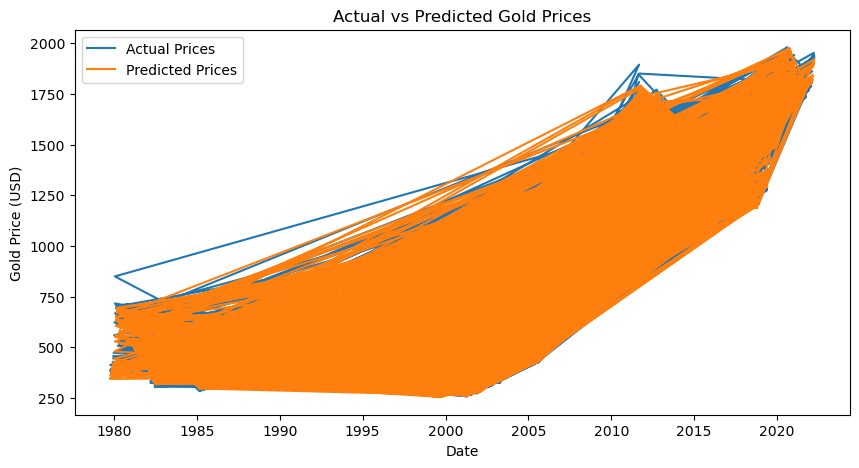

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD)')
plt.title('Actual vs Predicted Gold Prices')
plt.legend()
plt.show()
